In [2]:
import os
import ast
import ineqpy
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
path_data = Path("../data")
path_meta = Path("../meta")

font_size = 15

platform_abbreviation_mapping = {
    'gh': 'GitHub',
    'hf': 'Hugging Face Spaces',
    'pwc': 'Papers With Code',
    'ip': 'independent platform',
}

platform_abbreviation_mapping_inverse = {v: k for k, v in platform_abbreviation_mapping.items()}

leaderboard_organization_tactics_mapping = {
    'Algorithm': ['Algorithm'],
    'Evaluation Configuration': ['Dataset Slice', 'Evaluator', 'Metric'],
    'Leaderboard Aggregation': ['Aggregated Result'],
    'Leaderboard Release': ['Leaderboard Launch Date', 'Leaderboard Version'],
    'Model Capability': ['Benchmark Dataset', 'Service Load', 'Supported Functionality', 'Supported Language', 'Supported Modality', 'Task'],
    'Model Information': ['Model Accessibility', 'Model Size', 'Model Type'],
    'Prompt Engineering': ['#Prompt Example', 'Output Length', 'Prompt Design', 'Prompt Length', 'Relation Extractor', 'Tokenizer']
}

pwc_organization_strategies = {'Task'}

submission_avenue_synonyms = {
    'Competition': ['Hackathon']
}

leaderboard_system_without_evaluation_datasets = ['Hackathon Somos NLP 2023 Leaderboard', 'Somos NLP Likes Leaderboard', 'Ko Chatbot Arena Leaderboard']

leaderboard_system_without_pull_requests = ['FSMBench', 'CompMix', 'DocVQA', 'GENIE', 'InfographicVQA', 'LMExamQA', 'Models Leaderboard', 'MP-DocVQA', 'OpenEval (text)', 'Program Synthesis Models Leaderboard', 'ProtoQA', 'TextSynth Server']

leaderboard_system_without_contacts = ['OpenEval (text)']

leaderboard_system_without_documentation = ['Hackathon Somos NLP 2023 Leaderboard', 'Somos NLP Likes Leaderboard', 'FSMBench']

leaderboard_system_without_evaluation_harness = ['Hackathon Somos NLP 2023 Leaderboard', 'Somos NLP Likes Leaderboard', 'LLM-Leaderboard']

workflow_patterns_with_submission = ['1', '2', '3', '4', '5']

macro_display_format_mapping = {
    'Table': ['Regular Table', 'Rankable Table', 'Table Screenshot'],
    'Figure': ['Bar Chart', 'Box Plot', 'Heat Map', 'Line Chart', 'Pie Chart', 'Radar Chart', 'Scatter Plot', 'Rankable Bar Chart'],
}

publisher_synonyms = {
    'Alibaba Group': ['Alibaba Group DAMO Academy', 'Aliyun'],
    'Amazon': ['Amazon Alexa AI Lab', 'Amazon AWS AI Lab'],
    'Agency for Science Technology and Research': ['A*STAR I2R', 'CFAR A*STAR'],
    'Bauhaus University': ['Bauhaus University Weimar'],
    'ByteDance': ['ByteDance AI Lab'],
    'Fraunhofer Society': ['Fraunhofer Institute for Integrated Circuits'],
    'Frédéric Joliot Institute for Life Sciences': ['NeuroSpin'],
    'Google': ['Google Brain', 'Google DeepMind', 'Google Blueshift'],
    'Huawei': ["Huawei Noah's Ark Lab"],
    'Kunlun Tech': ['Skywork'],
    'Max Planck Society': ['Max Planck Institute for Informatics', 'Max Planck Institute for Intelligent Systems', 'Max Planck Institute for Mathematics in the Sciences'],
    'Meta': [
        'Meta FAIR',
        'Meta GenAI'
    ],
    'Microsoft': ['Microsoft Research Asia'],
    'National Public School': ['National Public School HSR Layout'],
    'Naver': ['Naver Labs Europe'],
    'Queen\'s University Kingston': ['Queen\'s University'],
    'Tencent': [
        'Tencent AI Lab',
        'Tencent ARC Lab',
        'Tencent Youtu Lab'
    ],
    'Toyota Technological Institute': ['Toyota Technological Institute Chicago'],
    'University of California': [
        'University of California Berkeley',
        'University of California Davis',
        'University of California Irvine',
        'University of California Los Angeles',
        'University of California Santa Barbara',
        'University of California San Diego',
    ],
    'University of Michigan': ['University of Michigan Ann Arbor'],
    'University of North Carolina': ['University of North Carolina Chapel Hill'],
    'University of Illinois': ['University of Illinois Chicago', 'University of Illinois Urbana Champaign'],
    'University of Massachusetts': ['University of Massachusetts Amherst'],
    'University of Maryland': ['University of Maryland College Park'],
    'University of Tennessee': ['University of Tennessee Knoxville'],
    'University of Texas': ['University of Texas Austin'],
    'University of Wisconsin': ['University of Wisconsin Madison'],
}

metrics_synonyms = {
    'accuracy': [
        'acc',
        'accuarcy',
        'qa accuracy'
    ],
    'average': [
        'avg',
        '平均'
    ],
    'average accuracy': [
        'avg. accuracy'
    ],
    'average score': ['平均分'],
    'bleu': ['bleu score'],
    'bleu-1': [
        'narrativeqa bleu-1',
        'socialiqa bleu-1',
        'mcscript bleu-1',
        'cosmosqa bleu-1'
    ],
    'bleu-4': ['bleu4'],
    'bertscore': ['bert score'],
    'code': ['代码'],
    'elo rating': [
        'chatbot arena elo',
        'elo'
    ],
    'exact match': ['em', 'exact match accuracy'],
    'lerc': [
        'cosmosqa lerc',
        'mcscript lerc',
        'socialiqa lerc',
        'narrativeqa lerc'
    ],
    'link': ['url'],
    'mean rank': [
        'text-to-video mean rank',
        'video-to-text mean rank'
    ],
    'median rank': [
        'text-to-video median rank',
        'video-to-text median rank',
        'text-to-videomedian rank',
        'text-to-video medianr'
    ],
    'meteor': [
        'cosmosqa meteor',
        'narrativeqa meteor',
        'socialiqa meteor',
        'mcscript meteor'
    ],
    'neg mean rank': [
        'i->t neg mean rank',
        't->i neg mean rank'
    ],
    'organization': [
        '发布机构',
        '机构',
        'orgaisation',
    ],
    'others': ['其他'],
    'overall': ['xiezhi overall'],
    'overall score': [
        '总分',
        '总体分数'
    ],
    'pass@1': [
        'interview pass@1',
        'competition pass@1',
        'introductory pass@1'
    ],
    'pass@5': [
        'interview pass@5',
        'introductory pass@5',
        'competition pass@5'
    ],
    'pass@1000': [
        'interview pass@1000',
        'competition pass@1000',
        'introductory pass@1000'
    ],
    'pass@any': [
        'introductory pass@any',
        'competition pass@any',
        'interview pass@any'
    ],
    '#parameters':  [
        '#p',
        '#params',
        '# params',
        '#size',
        '参数量',
        'model size',
        'model size/b',
        'number of params',
        'param',
        'parameters',
        'params',
        'size'
    ],
    'perplexity': ['ppl'],
    'precision@1': ['i->t p@1'],
    'precision@20': ['p@20'],
    'recall@1': [
        'r@1',
        'text-to-videor@1',
        'video-to-text r@1',
        'text-to-video r@1',
        'text-to-image r@1',
        'image-to-text r@1'
    ],
    'recall@5': [
        'text-to-image r@5',
        'video-to-text r@5',
        'image-to-text r@5',
        'text-to-video r@5',
        'r@5',
    ],
    'recall@10': [
        'recall@10 on 1 rounds',
        'recall@10 on 2 rounds',
        'recall@10 on 3 rounds',
        'r@10',
        'video-to-text r@10',
        'text-to-image r@10',
        'text-to-video r@10',
        'image-to-text r@10'
    ],
    'recall@50': [
        'text-to-video r@50',
        'video-to-text r@50',
    ],
    'score': ['分数'],
    'submission date': ['提交时间'],
    'top-1 accuracy': ['top 1 accuracy'],
    'top-5 accuracy': ['top 5 accuracy'],
    'type': ['model type'],
    'win rate': ['胜率'],
    'word error rate': ['wer']
}

workflow_pwc = ['1']
display_format_pwc = ['Rankable Table', 'Scatter Plot']
dashed_model_leaderboards = ['MMCU', 'SuperCLUE-Math6']
non_literature_type = ['blog', 'report', 'white paper']

metrics_synonyms_inverse = {}
for key, values in metrics_synonyms.items():
    for value in values:
        metrics_synonyms_inverse[value] = key

submission_avenue_synonyms_inverse = {}
for key, values in submission_avenue_synonyms.items():
    for value in values:
        submission_avenue_synonyms_inverse[value] = key

macro_display_format_mapping_inverse = {v: k for k, values in macro_display_format_mapping.items() for v in values}

publisher_synonyms_inverse = {}
for key, values in publisher_synonyms.items():
    for value in values:
        publisher_synonyms_inverse[value] = key

leaderboard_organization_tactics_mapping_inverse = {}
for key, values in leaderboard_organization_tactics_mapping.items():
    for value in values:
        leaderboard_organization_tactics_mapping_inverse[value] = key

def convert_df_to_dict(df):
    """
    Convert a DataFrame of leaderboards and metrics to a dictionary.

    :param df: DataFrame with leaderboards and metrics
    :return: Dictionary with leaderboards as keys and list of metrics as values
    """
    leaderboard_data = {}

    # Ensure the DataFrame's first column is considered as the keys
    # and iterate through each row to construct the dictionary
    for _, row in df.iterrows():
        key = row[0]  # The first column serves as the key
        # List comprehension to get non-empty values from the rest of the row
        values = [value for value in row[1:] if pd.notna(value)]
        leaderboard_data[key] = values

    return leaderboard_data

def string_to_list(text, platform=False):
    if pd.isna(text) or text == 'nan':
        return []
    elif platform:
        return [platform_abbreviation_mapping[platform] for platform in text.split(',')]
    else:
        return text.split(',')

def string_to_dict(s, platform=False, list_format=False):
    # Check if the input is np.nan
    if pd.isna(s):
        if list_format:
            return []
        return {}
    
    # Split the string into key-value pairs
    pairs = s.split(',')
    result_dict = {}
    result_list = []
    
    for pair in pairs:
        # Split each pair by ':' to separate keys and values
        key, value = pair.split(':')
        # Split the value by '+' to get the list of items
        value_list = value.split('+')
        # Assign the list to the key in the dictionary
        if platform:
            result_dict[platform_abbreviation_mapping[key]] = value_list
        else:
            result_dict[key] = value_list
        result_list.extend(value_list)
            
    if list_format:
        return result_list
    return result_dict

# Function to format each value based on its own decimal places
def format_individual_value(x):
    if isinstance(x, float):
        # Use string formatting to maintain original decimal places
        return "{:f}".format(x).rstrip('0').rstrip('.')
    return x

def print_empty_folders(root_dir):
    for dirpath, dirname, filenames in os.walk(root_dir):
        # Check if both lists of subdirectories and filenames are empty
        if not filenames and dirpath != root_dir:
            print(f"Empty folder: {dirpath}")
            
def list_directories(folder_path):
    # List all subdirectories within the folder
    directories = [os.path.join(folder_path, d) for d in os.listdir(
        folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return directories

def publisher_synonyms_mapping(publishers):
    publishers_processed = set()
    for publisher in publishers:
        if publisher in publisher_synonyms_inverse:
            publishers_processed.add(publisher_synonyms_inverse[publisher])
        # elif 'Independent Contributor' == publisher:
        #     publishers_processed.add(leaderboard)
        else:
            publishers_processed.add(publisher)
    return publishers_processed

def submission_avenue_synonyms_mapping(submission_avenue):
    submission_avenue_processed = set()
    for avenue in submission_avenue:
        if avenue in submission_avenue_synonyms_inverse:
            submission_avenue_processed.add(submission_avenue_synonyms_inverse[avenue])
        else:
            submission_avenue_processed.add(avenue)
    return submission_avenue_processed

def keep_rows_by_list_column(df, column_name, keyword_list):
    """
    Filters rows in a DataFrame based on whether all elements in a specified list column are in a given keyword list.
    
    Parameters:
    - df: Pandas DataFrame.
    - column_name: The name of the column containing lists of strings.
    - keyword_list: A list of keywords to check against.
    
    Returns:
    - A filtered Pandas DataFrame.
    """
    # Convert the keyword list to a set for faster membership testing
    keyword_set = set(keyword_list)
    
    # Define a lambda function to check if all elements of a list are in the keyword_set
    all_in_keywords = lambda x: all(item in keyword_set for item in x)
    
    # Apply the lambda function to the specified column and invert the boolean Series to filter rows
    filtered_df = df[df[column_name].apply(all_in_keywords)]
    
    return filtered_df

def filter_rows_by_list_column(df, column_name, keyword_list):
    """
    Filters rows in a DataFrame based on whether all elements in a specified list column are in a given keyword list.
    
    Parameters:
    - df: Pandas DataFrame.
    - column_name: The name of the column containing lists of strings.
    - keyword_list: A list of keywords to check against.
    
    Returns:
    - A filtered Pandas DataFrame.
    """
    # Convert the keyword list to a set for faster membership testing
    keyword_set = set(keyword_list)
    
    # Define a lambda function to check if all elements of a list are in the keyword_set
    all_in_keywords = lambda x: all(item in keyword_set for item in x)
    
    # Apply the lambda function to the specified column and invert the boolean Series to filter rows
    filtered_df = df[~df[column_name].apply(all_in_keywords)]
    
    return filtered_df

In [4]:
xlsx = pd.ExcelFile(path_meta / 'Foundation Model Leaderboards.xlsx')
df_leaderboard = pd.read_excel(xlsx, sheet_name='Leaderboard')

for index, row in df_leaderboard.iterrows():
    os.makedirs(path_data / row['Leaderboard name'], exist_ok=True) 

print_empty_folders(str(path_data))

In [5]:
import glob

directory = path_data / 'BLINK'
channel = ''
drop_columns = []

for file_path in glob.glob(str(directory / "*.csv")):
    df = pd.read_csv(file_path)#, delimiter=";")
    df.drop(columns=drop_columns, inplace=True)
    filename = os.path.basename(file_path)
    filename = filename.replace(".csv", ".json")
    if channel:
        filename = f'{channel}-{filename}'
    df.to_json(directory / filename, orient="records", indent=4)
    os.remove(file_path)


In [6]:
total_records = 0
total_leaderboards = 0
total_leaderboard_systems = 0

with pd.ExcelFile(path_meta / 'Foundation Model Leaderboards.xlsx') as excel_file:
    df_leaderboard = pd.read_excel(excel_file, sheet_name='Leaderboard')

    df_leaderboard['Downloadable file formats (non-pwc)'] = df_leaderboard['Downloadable file formats (non-pwc)'].apply(string_to_list)
    df_leaderboard['Leaderboard development workflows (non-pwc)'] = df_leaderboard['Leaderboard development workflows (non-pwc)'].astype(str).apply(string_to_list)
    df_leaderboard['Platforms'] = df_leaderboard['Platforms'].apply(lambda x: string_to_list(x, platform=True))
    df_leaderboard['Display formats (non-pwc)'] = df_leaderboard['Display formats (non-pwc)'].apply(lambda x: string_to_dict(x, platform=True, list_format=True))
    df_leaderboard['Publication venues'] = df_leaderboard['Publication venues'].apply(string_to_list)
    df_leaderboard['Release organizations (non-pwc)'] = df_leaderboard['Release organizations (non-pwc)'].apply(string_to_list)

    df_leaderboard['Display formats'] = [set() for _ in range(len(df_leaderboard))]
    df_leaderboard['Evaluation metrics (pwc)'] = [set() for _ in range(len(df_leaderboard))]
    df_leaderboard['Leaderboard development workflows'] = [set() for _ in range(len(df_leaderboard))]
    df_leaderboard['Participative models'] = [set() for _ in range(len(df_leaderboard))]
    df_leaderboard['Release organizations'] = [set() for _ in range(len(df_leaderboard))]

    for index, row in df_leaderboard.iterrows():
        total_leaderboard_systems += 1
        display_formats = set(row['Display formats (non-pwc)'])
        publishers = publisher_synonyms_mapping(row['Release organizations (non-pwc)'])
        workflows = set(row['Leaderboard development workflows (non-pwc)'])
            
        if row['Platforms'] == ['Papers With Code']:
            publishers.add('Papers With Code')
            
        if 'Papers With Code' in row['Platforms']:
            display_formats = display_formats.union(display_format_pwc)
            workflows = workflows.union(workflow_pwc)
        
        df_leaderboard.at[index, 'Display formats'] = display_formats
        df_leaderboard.at[index, 'Leaderboard development workflows'] = workflows
        df_leaderboard.at[index, 'Release organizations'] = publishers
        df_leaderboard.at[index, '#Display format'] = len(display_formats)
        df_leaderboard.at[index, '#Leaderboard development workflows'] = len(workflows)
        df_leaderboard.at[index, '#Release organization'] = len(publishers)
        df_leaderboard.at[index, '#Host platform'] = len(row['Platforms'])

        records = 0
        leaderboards = 0
        model_names = set()
        template_metrics = set()
    
        for file in os.listdir(path_data / row['Leaderboard name']):
            if not file.endswith('json'):
                continue
            
            host_platform = platform_abbreviation_mapping[file.split('.')[0].split('-')[0]]
            if host_platform not in row['Platforms']:
                continue
        
            file_path = path_data / row['Leaderboard name'] / file
            df = pd.read_json(file_path)
        
            leaderboards += 1
            records += len(df)
            file_name = file.split('/')[-1]
            model_names = model_names.union(set(df['Model']))
            if file_name.startswith('pwc'):
                keys = set()
                for item in df['metrics']:
                    for key in item.keys():
                        key_processed = key.split('(')[0].lower().strip()
                        if key_processed in metrics_synonyms_inverse:
                            keys.add(metrics_synonyms_inverse[key_processed])
                        else:
                            keys.add(key_processed)
                template_metrics = template_metrics.union(keys)
    
        total_records += records
        total_leaderboards += leaderboards
        
        df_leaderboard.at[index, '#Evaluation record'] = records
        df_leaderboard.at[index, '#Participative model'] = len(model_names)
        df_leaderboard.at[index, '#Leaderboard'] = leaderboards
        if template_metrics:
            df_leaderboard.at[index, '#Evaluation metric (pwc)'] = len(template_metrics)
            df_leaderboard.at[index, 'Evaluation metrics (pwc)'] = list(template_metrics)

    df_leaderboard.to_csv(path_meta / 'leaderboard_processed.csv', index=False)

print(f"Total number of leaderboards: {total_leaderboard_systems}")
print(f"Total number of leaderboards: {total_leaderboards}")
print(f"Total number of evaluation records: {total_records}")


Total number of leaderboards: 441
Total number of leaderboards: 2986
Total number of evaluation records: 83482


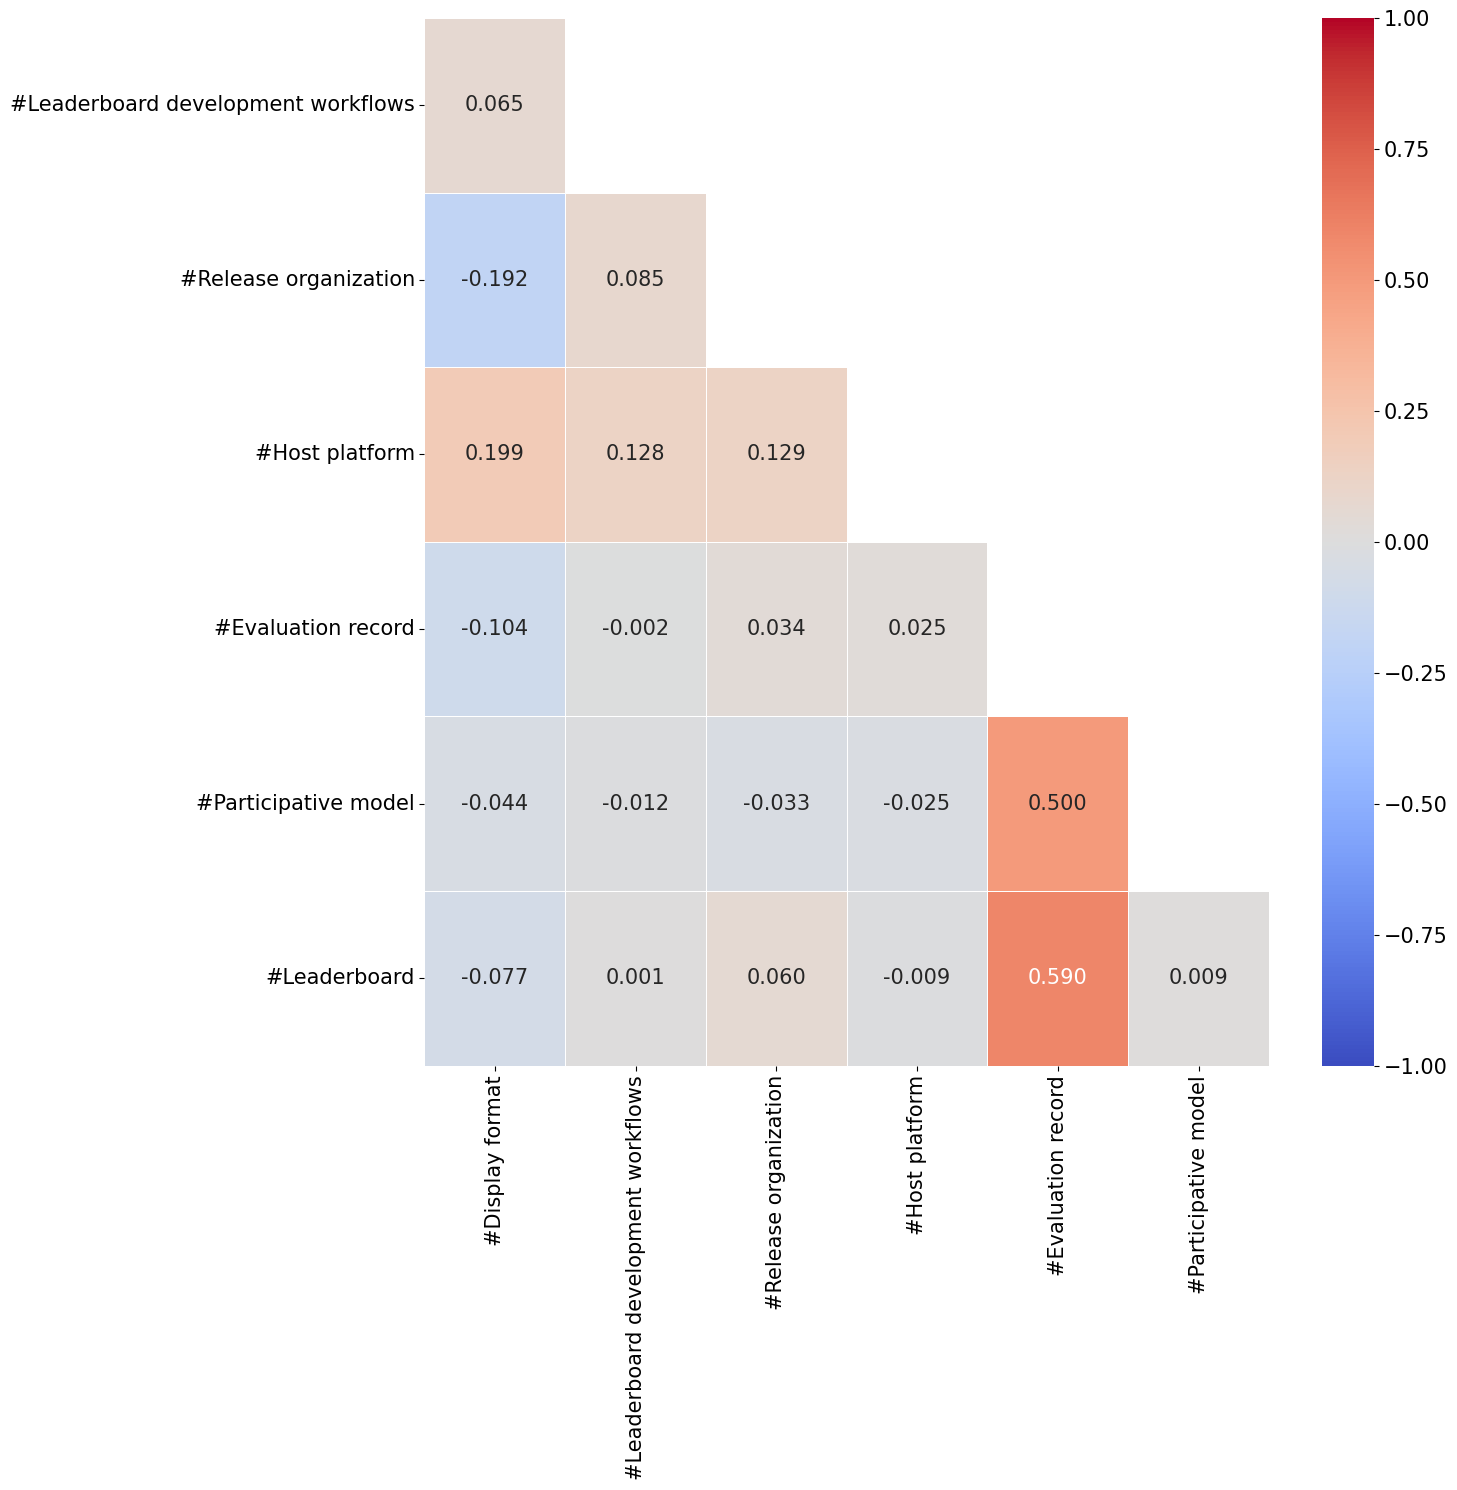

In [7]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns=['#Evaluation metric (pwc)'])
corr_matrix = numeric_df.corr()

# Drop the first row
corr_matrix_dropped_row = corr_matrix.drop(corr_matrix.index[0])

# Drop the last column
corr_matrix_dropped = corr_matrix_dropped_row.drop(corr_matrix_dropped_row.columns[-1], axis=1)

# Generate a mask for the upper triangle, including the diagonal
mask = np.triu(np.ones_like(corr_matrix_dropped, dtype=bool), 1)

# Generate a heatmap for the correlation matrix with the mask
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr_matrix_dropped, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, mask=mask, vmin=-1, vmax=1, annot_kws={"size": font_size})
# Enlarge axis font size
ax.tick_params(axis='both', which='major', labelsize=font_size)
# Rotate y-axis labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
# Adjust color bar (color scale) font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=font_size)  # Adjusts the tick labels' font size

plt.tight_layout()  # Adjust the layout to make sure everything fits
plt.show()


In [8]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Platforms'] = df['Platforms'].apply(ast.literal_eval)
df['Platforms'] = df['Platforms'].apply(lambda x: [platform_abbreviation_mapping_inverse[platform] for platform in x])
df['Platforms'] = df['Platforms'].apply(lambda x: ','.join(x).upper())
df = df.explode('Platforms')['Platforms'].value_counts().reset_index(name='Frequency')

fig = px.bar(
    x=df['Platforms'],
    y=df['Frequency'],
    text_auto=True,
    labels={'x': 'Host Platform Combination', 'y': 'Number of Leaderboards'},
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    ),
    xaxis=dict(title_font=dict(size=18, family='Arial, bold', color='black')),  # Bold x-axis label
    yaxis=dict(title_font=dict(size=18, family='Arial, bold', color='black'))   # Bold y-axis label
)
pio.write_image(fig, f'{path_meta}/platform-combo-distribution.pdf')
fig.show()

In [9]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Platforms'] = df['Platforms'].apply(ast.literal_eval)
print(f"{round(len(df[df['Platforms'].map(len) > 1])/len(df)*100,2)}% ({len(df[df['Platforms'].map(len) > 1])} out of {len(df)}) leaderboards are hosted on multiple platforms.")

df_split = df.explode('Platforms')['Platforms'].value_counts().reset_index(name='Frequency')
print(f"{df_split['Platforms'].iloc[0]} is the most popular host platform, accounting for {round(df_split['Frequency'].iloc[0]/len(df)*100,2)}% ({df_split['Frequency'].iloc[0]} out of {len(df)}) leaderboards.")
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Platforms',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_split['Ratio'] = round(df_split['Frequency'] / len(df) * 100, 2)

fig = px.bar(
    x=df_split['Platforms'],
    y=df_split['Frequency'],
    text_auto=True,
    labels={'x': 'Platforms', 'y': 'Number of Leaderboards'},
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
# Add Ratio as text on each bar
for i, d in enumerate(df_split.itertuples()):
    fig.add_annotation(
        x=d.Platforms,
        y=d.Frequency,
        text=f'{d.Ratio}%',
        showarrow=False,
        yshift=10
    )
fig.show()

11.79% (52 out of 441) leaderboards are hosted on multiple platforms.
Papers With Code is the most popular host platform, accounting for 43.76% (193 out of 441) leaderboards.


In [10]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Display formats'] = df['Display formats'].apply(ast.literal_eval)

df_split = df.explode('Display formats')['Display formats'].value_counts().reset_index(name='Frequency')
print(f"{df_split['Display formats'].iloc[0]} is the most popular display format of leaderboards, accounting for {round(df_split['Frequency'].iloc[0]/len(df)*100,2)}% ({df_split['Frequency'].iloc[0]} out of {len(df)}) leaderboards.")
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Display Formats',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_split['Ratio'] = round(df_split['Frequency'] / len(df) * 100, 2)

fig = px.bar(
    x=df_split['Display formats'],
    y=df_split['Ratio'],
    text_auto=True,
    labels={'x': 'Display format', 'y': 'Number of Leaderboards'},
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()

Rankable Table is the most popular display format of leaderboards, accounting for 77.32% (341 out of 441) leaderboards.


In [11]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Downloadable file formats (non-pwc)'] = df['Downloadable file formats (non-pwc)'].apply(ast.literal_eval)
print(f"{round(len(df[df['Downloadable file formats (non-pwc)'].map(len) > 0])/len(df)*100,2)}% ({len(df[df['Downloadable file formats (non-pwc)'].map(len) > 0])} out of {len(df)}) leaderboards provide downloadable files of the leaderboards.")

df = df[df['Downloadable file formats (non-pwc)'].map(len) > 0]
df_split = df.explode('Downloadable file formats (non-pwc)')['Downloadable file formats (non-pwc)'].value_counts().reset_index(name='Frequency')
print(f"{df_split['Downloadable file formats (non-pwc)'].iloc[0]} is the most popular storage format of leaderboards, accounting for {round(df_split['Frequency'].iloc[0]/len(df)*100,2)}% ({df_split['Frequency'].iloc[0]} out of {len(df)}) downloadable leaderboards.")
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Downloadable File Formats',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_split['Ratio'] = round(df_split['Frequency'] / len(df) * 100, 2)

fig = px.bar(
    x=df_split['Downloadable file formats (non-pwc)'],
    y=df_split['Ratio'],
    text_auto=True,
    labels={'x': 'Downloadable File Formats', 'y': 'Number of Leaderboards'},
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()

12.93% (57 out of 441) leaderboards provide downloadable files of the leaderboards.
CSV is the most popular storage format of leaderboards, accounting for 78.95% (45 out of 57) downloadable leaderboards.


In [12]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')

df['Release organizations'] = df['Release organizations'].apply(ast.literal_eval)
df_split = df.explode('Release organizations').groupby('Release organizations').size().reset_index(name='Frequency')
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Release Organizations',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df_split.sort_values(by='Frequency', ascending=False).head(10)
print(f"{df_top['Release organizations'].iloc[0]} stands out as the most prolific release organization among the {len(df_split['Release organizations'].unique())-1} identified organizations, contributing to a notable {round(df_top['Frequency'].iloc[0]/len(df)*100,2)}% ({df_top['Frequency'].iloc[0]} out of {len(df)}) leaderboards.")

df_top['Ratio'] = round(df_top['Frequency'] / len(df) * 100, 2)

fig = go.Figure(go.Bar(
        x=df_top['Frequency'],  # Values for the bar lengths
        y=df_top['Release organizations'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['Ratio'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        title=f'Number of Leaderboards across Release Organizations (Top 10)',
        xaxis_title='Leaderboard Number',
        yaxis_title='Publisher Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
fig.show()


Papers With Code stands out as the most prolific release organization among the 235 identified organizations, contributing to a notable 42.86% (189 out of 441) leaderboards.


In [13]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df = df[df['Platforms'] != "['Papers With Code']"]

statistics = {
    'Distribution': 'Release Organizations across Leaderboards',
    'Mean': np.mean(df['#Release organization']),
    'Median': np.median(df['#Release organization']),
    'IQR': df['#Release organization'].quantile(0.75) - df['#Release organization'].quantile(0.25),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df.drop_duplicates(subset=['Leaderboard name']).sort_values(by='#Release organization', ascending=False).head(10)
print(f"{df_top['Leaderboard name'].iloc[0]} holds the highest number of release organizations up to {int(df_top['#Release organization'].iloc[0])}.")

fig = go.Figure(go.Bar(
        x=df_top['#Release organization'],  # Values for the bar lengths
        y=df_top['Leaderboard name'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['#Release organization'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Number of Release Organization',
        yaxis_title='Leaderboard Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()


TrustLLM holds the highest number of release organizations up to 36.


In [14]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Publication venues'] = df['Publication venues'].apply(ast.literal_eval)
df_pub = df[df['Publication venues'].apply(len) > 0]
print(f"{round(len(df_pub)/len(df)*100,2)}% ({len(df_pub)} out of {len(df)}) leaderboards are associated with specific publications, including research articles, blog posts, and white papers.")

df_literature = filter_rows_by_list_column(df_pub, 'Publication venues', non_literature_type)
print(f"{round(len(df_literature)/len(df_pub)*100,2)}% ({len(df_literature)} out of {len(df_pub)}) publications have been accepted in a specific workshop, conference, magzine, or journal.")
df_split = df_literature.explode('Publication venues').groupby('Publication venues').size().reset_index(name='Frequency')
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Publication Venues',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df_split.sort_values(by='Frequency', ascending=False).head(10)
print(f"{df_top['Publication venues'].iloc[0]} emerges as the conference with the most number of accepted publications, accounting for {round(df_top['Frequency'].iloc[0]/len(df_literature)*100,2)}% ({df_top['Frequency'].iloc[0]} out of {len(df_literature)}) of those published.")

df_top['Ratio'] = round(df_top['Frequency'] / len(df_literature) * 100, 2)

fig = go.Figure(go.Bar(
        x=df_top['Frequency'],  # Values for the bar lengths
        y=df_top['Publication venues'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['Ratio'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        title=f'Number of Leaderboards with Accepted Publications across Publication Venues (Top 10)',
        xaxis_title='Leaderboard Number',
        yaxis_title='Publication Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
fig.show()


85.26% (376 out of 441) leaderboards are associated with specific publications, including research articles, blog posts, and white papers.
61.7% (232 out of 376) publications have been accepted in a specific workshop, conference, magzine, or journal.
EMNLP emerges as the conference with the most number of accepted publications, accounting for 16.81% (39 out of 232) of those published.


In [15]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')

statistics = {
    'Distribution': 'Participative Models across Leaderboards',
    'Mean': np.mean(df['#Participative model']),
    'Median': np.median(df['#Participative model']),
    'IQR': df['#Participative model'].quantile(0.75) - df['#Participative model'].quantile(0.25),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df.drop_duplicates(subset=['Leaderboard name']).sort_values(by='#Participative model', ascending=False).head(10)
print(f"{df_top['Leaderboard name'].iloc[0]} has the highest number of {int(df_top['#Participative model'].iloc[0])} participative models.")

fig = go.Figure(go.Bar(
        x=df_top['#Participative model'],  # Values for the bar lengths
        y=df_top['Leaderboard name'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['#Participative model'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Number of Participative Models',
        yaxis_title='Leaderboard Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()


Open LLM Leaderboard (GPT) has the highest number of 5485 participative models.


In [16]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df = df[df['Platforms'] == "['Papers With Code']"]

statistics = {
    'Distribution': 'Evaluation Metrics across Leaderboards',
    'Mean': np.mean(df['#Evaluation metric (pwc)']),
    'Median': np.median(df['#Evaluation metric (pwc)']),
    'IQR': df['#Evaluation metric (pwc)'].quantile(0.75) - df['#Evaluation metric (pwc)'].quantile(0.25),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df.drop_duplicates(subset=['Leaderboard name']).sort_values(by='#Evaluation metric (pwc)', ascending=False).head(10)
print(f"{df_top['Leaderboard name'].iloc[0]} has the highest number of {int(df_top['#Evaluation metric (pwc)'].iloc[0])} evaluation metrics.")

fig = go.Figure(go.Bar(
        x=df_top['#Evaluation metric (pwc)'],  # Values for the bar lengths
        y=df_top['Leaderboard name'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['#Evaluation metric (pwc)'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Number of Evaluation Metrics',
        yaxis_title='Leaderboard Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()


ChEBI-20 has the highest number of 20 evaluation metrics.


In [17]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df = df[df['Platforms'] == "['Papers With Code']"]
df['Evaluation metrics (pwc)'] = df['Evaluation metrics (pwc)'].apply(ast.literal_eval)

df_split = df.explode('Evaluation metrics (pwc)').groupby('Evaluation metrics (pwc)').size().reset_index(name='Frequency')
df_split['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Evaluation Metrics',
    'Mean': np.mean(df_split['Frequency']),
    'Median': np.median(df_split['Frequency']),
    'IQR': df_split['Frequency'].quantile(0.75) - df_split['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_split, income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df_split.drop_duplicates(subset=['Evaluation metrics (pwc)']).sort_values(by='Frequency', ascending=False).head(10)
print(f"{df_top['Evaluation metrics (pwc)'].iloc[0]} is the most prevalent evaluation metrics in {round(df_top['Frequency'].iloc[0]/len(df)*100,2)}% ({df_top['Frequency'].iloc[0]} out of {len(df)}) leaderboards.")

fig = go.Figure(go.Bar(
        x=df_top['Frequency'],  # Values for the bar lengths
        y=df_top['Evaluation metrics (pwc)'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['Frequency'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Leaderboard Number',
        yaxis_title='Evaluation Metric',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()

accuracy is the most prevalent evaluation metrics in 41.27% (78 out of 189) leaderboards.


In [18]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Weight'] = 1

statistics = {
    'Distribution': 'Leaderboards across Leaderboards',
    'Mean': np.mean(df['#Leaderboard']),
    'Median': np.median(df['#Leaderboard']),
    'IQR': df['#Leaderboard'].quantile(0.75) - df['#Leaderboard'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df, income='#Leaderboard', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df.drop_duplicates(subset=['Leaderboard name']).sort_values(by='#Leaderboard', ascending=False).head(10)
print(f"{df_top['Leaderboard name'].iloc[0]} has the highest number of {int(df_top['#Leaderboard'].iloc[0])} leaderboards.")

fig = go.Figure(go.Bar(
        x=df_top['#Leaderboard'],  # Values for the bar lengths
        y=df_top['Leaderboard name'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['#Leaderboard'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Split Number',
        yaxis_title='Leaderboard Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()


LMExamQA has the highest number of 887 leaderboards.


In [19]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Weight'] = 1

statistics = {
    'Distribution': 'Evaluation Records across Leaderboards',
    'Mean': np.mean(df['#Evaluation record']),
    'Median': np.median(df['#Evaluation record']),
    'IQR': df['#Evaluation record'].quantile(0.75) - df['#Evaluation record'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df, income='#Evaluation record', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_top = df.drop_duplicates(subset=['Leaderboard name']).sort_values(by='#Evaluation record', ascending=False).head(10)
print(f"{df_top['Leaderboard name'].iloc[0]} has the highest number of {int(df_top['#Evaluation record'].iloc[0])} evaluation records.")

fig = go.Figure(go.Bar(
        x=df_top['#Evaluation record'],  # Values for the bar lengths
        y=df_top['Leaderboard name'],  # Categories for each bar
        orientation='h',  # Sets the bars to be horizontal
        text=df_top['#Evaluation record'],  # Adds the values as text on each bar
        textposition='auto'  # Automatically positions the text on the bars
))
fig.update_layout(
        xaxis_title='Number of Evaluation Records',
        yaxis_title='Leaderboard Name',
        yaxis_autorange='reversed'  # This line makes the bars go top-down
)
# Update the layout for a tighter look
fig.update_layout(
    autosize=True,
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=4  # Padding between the plot and the margin
    )
)
fig.show()


HELM Classic has the highest number of 16005 evaluation records.


In [20]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
df['Leaderboard development workflows'] = df['Leaderboard development workflows'].apply(ast.literal_eval)

df = df[df['Leaderboard development workflows'].map(len) > 0]
df_workflow = df.explode('Leaderboard development workflows')
df_workflow = df_workflow.groupby('Leaderboard development workflows').size().reset_index(name='Frequency')
df_workflow['Leaderboard development workflows'] = df_workflow['Leaderboard development workflows'].apply(lambda x: f'Pattern {x}' if x != 'Unknown' else x)
df_workflow.sort_values(by='Frequency', ascending=False, inplace=True)
df_workflow['Weight'] = 1

print(f"{df_workflow['Leaderboard development workflows'].iloc[0]} is the most prevalent ({df_workflow['Frequency'].iloc[0]} out of {len(df)}) workflow pattern that accounts for {round(df_workflow['Frequency'].iloc[0]/len(df)*100,2)}%.")
df_pwc = df[df['Platforms'] == "['Papers With Code']"]
print(f'In {df_workflow["Leaderboard development workflows"].iloc[0]}, {round(len(df_pwc)/df_workflow["Frequency"].iloc[0]*100,2)}% ({len(df_pwc)} out of {df_workflow["Frequency"].iloc[0]}) of the leaderboards are hosted on Papers With Code.')
print(f"There are {round(df_workflow[df_workflow['Leaderboard development workflows'] == 'Unknown']['Frequency'].iloc[0]/(len(df)-len(df_pwc))*100,2)}% ({df_workflow[df_workflow['Leaderboard development workflows'] == 'Unknown']['Frequency'].iloc[0]} out of {len(df)-len(df_pwc)}) non-PWC leaderboards with unknown workflow patterns.")

statistics = {
    'Distribution': 'Leaderboards across Workflow Patterns',
    'Mean': np.mean(df_workflow['Frequency']),
    'Median': np.median(df_workflow['Frequency']),
    'IQR': df_workflow['Frequency'].quantile(0.75) - df_workflow['Frequency'].quantile(0.25),
    'Gini Coefficient': ineqpy.inequality.gini(data=df_workflow[df_workflow['Leaderboard development workflows'] != 'Unknown'], income='Frequency', weights='Weight'),
}
if os.path.exists(path_meta / 'leaderboard_statistics.csv'):
    df_statistics = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
else:
    df_statistics = pd.DataFrame()
df_statistics = pd.concat([df_statistics, pd.DataFrame([statistics])], ignore_index=True)
df_statistics.drop_duplicates(subset=['Distribution'], keep='last', inplace=True)
df_statistics.sort_values(by='Distribution', inplace=True)
df_statistics.to_csv(path_meta / 'leaderboard_statistics.csv', index=False)

df_workflow['Ratio'] = round(df_workflow['Frequency'] / len(df) * 100, 2)
fig = px.bar(
    x=df_workflow['Leaderboard development workflows'], 
    y=df_workflow['Ratio'],
    text_auto=True,
    labels={'x': 'Leaderboard development workflows', 'y': 'Leaderboard Number'},
    title='Number of Leaderboards across Workflow Patterns (non-pwc)'
)
fig.show()

Pattern 1 is the most prevalent (213 out of 441) workflow pattern that accounts for 48.3%.
In Pattern 1, 88.73% (189 out of 213) of the leaderboards are hosted on Papers With Code.
There are 3.57% (9 out of 252) non-PWC leaderboards with unknown workflow patterns.


In [21]:
# df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
# df = df[df['Platforms'] == "['Papers With Code']"]

# total = 0
# community = 0
# evaluation = 0

# for root, dirs, files in os.walk(path_data):
#     for file in files:
#         if file.startswith('pwc') and file.endswith(".json"):
#             total += 1
#             if 'community' in file:
#                 community += 1
#             else:
#                 evaluation += 1

# pwc_workflow_pattern_mapping = {
#     'Workflow Pattern 7': f'{round(evaluation/total*100, 2)}% ({evaluation} out of {total})',
#     'Workflow Pattern 8': f'{round(community/total*100, 2)}% ({community} out of {total}))'
# }
# pwc_workflow_pattern_mapping

In [22]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
print(f"{round((len(df)-len(leaderboard_system_without_documentation))/(len(df))*100, 2)}% ({len(df)-len(leaderboard_system_without_documentation)} out of {len(df)}) leaderboards provide documentation.")
print(f"{round((len(df)-len(leaderboard_system_without_contacts))/(len(df))*100, 2)}% ({len(df)-len(leaderboard_system_without_contacts)} out of {len(df)}) leaderboards provide contact information.")
print(f"{round((len(df[df['Model linkage (non-pwc)'].notna()]))/(len(df))*100, 2)}% ({len(df[df['Model linkage (non-pwc)'].notna()])} out of {len(df)}) leaderboards provide provenance links of their participating models within their documentation or directly on the leaderboards.")
df['Leaderboard development workflows'] = df['Leaderboard development workflows'].apply(ast.literal_eval)
df_submission = keep_rows_by_list_column(df, 'Leaderboard development workflows', workflow_patterns_with_submission)
print(f"{round(len(df_submission)/(len(df))*100, 2)}% ({len(df_submission)} out of {len(df)}) leaderboards provide submission channels.")
df_pwc = df[df['Platforms'] == "['Papers With Code']"]
print(f"{round((len(df)-len(leaderboard_system_without_evaluation_harness)-len(df_pwc))/(len(df))*100, 2)}% ({len(df)-len(leaderboard_system_without_evaluation_harness)-len(df_pwc)} out of {len(df)}) leaderboards provide evaluation harness.")
print(f"{round((len(df)-len(leaderboard_system_without_pull_requests)-len(df_pwc))/(len(df))*100, 2)}% ({len(df)-len(leaderboard_system_without_pull_requests)-len(df_pwc)} out of {len(df)}) leaderboards provide pull request channels.")
print(f"{round((len(df)-len(leaderboard_system_without_pull_requests)-len(df_pwc))/(len(df))*100, 2)}% ({len(df)-len(leaderboard_system_without_pull_requests)-len(df_pwc)} out of {len(df)}) leaderboards provide discussion forums.")

99.32% (438 out of 441) leaderboards provide documentation.
99.77% (440 out of 441) leaderboards provide contact information.
29.02% (128 out of 441) leaderboards provide provenance links of their participating models within their documentation or directly on the leaderboards.
74.15% (327 out of 441) leaderboards provide submission channels.
56.46% (249 out of 441) leaderboards provide evaluation harness.
54.42% (240 out of 441) leaderboards provide pull request channels.
54.42% (240 out of 441) leaderboards provide discussion forums.


In [23]:
df = pd.read_csv(path_meta / 'leaderboard_processed.csv')
print(f"{round(len(df[df['#Empty leaderboards (non-pwc)'].notna()])/len(df)*100,2)}% ({len(df[df['#Empty leaderboards (non-pwc)'].notna()])} out of {len(df)}) leaderboards have empty leaderboards.")
df['#Empty leaderboards (non-pwc)'].value_counts().reset_index(name='Frequency')

1.13% (5 out of 441) leaderboards have empty leaderboards.


,#Empty leaderboards (non-pwc),Frequency
0,2,2
1,Unknown,2
2,25,1


In [24]:
df = pd.read_csv(path_meta / 'leaderboard_statistics.csv')
df.fillna('$\\times$', inplace=True)
df['Mean'] = df['Mean'].map('{:.2f}'.format)
df['Median'] = df['Median'].map('{:.1f}'.format)
df['IQR'] = df['IQR'].map('{:.0f}'.format)
df['Gini Coefficient'] = df['Gini Coefficient'].map(lambda x: '{:.3f}'.format(x) if isinstance(x,float) else x)
print(df.to_latex(index=False))


\begin{tabular}{lllll}
\toprule
Distribution & Mean & Median & IQR & Gini Coefficient \\
\midrule
Evaluation Metrics across Leaderboards & 3.20 & 2.0 & 3 & $\times$ \\
Evaluation Records across Leaderboards & 189.30 & 23.0 & 48 & 0.873 \\
Leaderboards across Display Formats & 67.45 & 5.0 & 71 & 0.809 \\
Leaderboards across Downloadable File Formats & 7.50 & 2.0 & 2 & 0.795 \\
Leaderboards across Evaluation Metrics & 2.27 & 1.0 & 1 & 0.501 \\
Leaderboards across Leaderboards & 6.77 & 1.0 & 2 & 0.796 \\
Leaderboards across Platforms & 124.00 & 108.5 & 54 & 0.241 \\
Leaderboards across Publication Venues & 3.89 & 1.0 & 1 & 0.647 \\
Leaderboards across Release Organizations & 3.50 & 1.0 & 1 & 0.632 \\
Leaderboards across Workflow Patterns & 49.89 & 9.0 & 66 & 0.722 \\
Participative Models across Leaderboards & 73.61 & 17.0 & 26 & $\times$ \\
Release Organizations across Leaderboards & 2.52 & 2.0 & 2 & $\times$ \\
\bottomrule
\end{tabular}



/var/folders/p7/fg_w39cx6pq23vf3798tdmq00000gn/T/ipykernel_85254/4002361276.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$\times$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

